**Universidade do Estado do Amazonas**

**Disciplina: Redes Neurais Artificiais**

**Professora: [Elloá B. Guedes](https://github.com/elloa)**

**Alunos: [Jakson Kelvin](https://github.com/jacksonks),[Jailson Pereira](https://github.com/jailsonpj)**

# Projeto prático 4 - Classificação de varidades de trigo

# Descrição

Três variedades de trigo (Kama, Rosa e Canadian) possuem sementes muito parecidas,
entretanto diferentes. Um grupo de pesquisadores poloneses coletou 70 amostras de cada
tipo e, usando uma técnica particular de raio-X, coletou medidas geométricas destas
sementes, a citar: área, perímetro, compactude, comprimento, largura, coeficiente de
assimetria e comprimento do sulco da semente. O dataset detalhado contendo as medições
pode ser encontrado em: https://archive.ics.uci.edu/ml/datasets/seeds#

[PDF da descrição do projeto](https://github.com/jailsonpj/neural_network/blob/master/projetos_praticos/projeto-4/rna-2018.2-pp4.pdf)


# Bibliotecas necessárias no projeto

- Pandas
- Numpy
- Sklearn
- Matplotlib

# Importando bibliotecas e módulos necessário no projeto

In [133]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import seaborn as sns

Como requisito do Projeto, as redes serão construídas com um *busca em grade* utilizando o módulo GridSearchCV da Sklearn.

GridSearchCV implementa um método de “ajuste” e “pontuação”. Também implementa “predict”, “predict_proba”, “decision_function”, “transform” e “inverse_transform” se eles forem implementados no estimador usado.

Os parâmetros do estimador usados para aplicar esses métodos são otimizados pela pesquisa de grade com validação cruzada sobre uma grade de parâmetros.



# Visualização dos Dados

In [146]:
data = pd.read_csv('seeds_dataset.txt',delimiter='\t',header=None,names=['A','P','C','comp','lar','ass','sulco','target'])

In [147]:
data.head(5)

,A,P,C,comp,lar,ass,sulco,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


**Os dados são composto por 7 preditores e um 1 atributo alvo:**

**- Atributos preditores:**
    - Área (A)
    - Perímetro (P)
    - Compactação (C)
    - Comprimento do Núcleo (comp)
    - Largura do Núcleo (lar)
    - Coeficiente de assimetria (ass)
    - Comprimento do sulco do núcleo (sulco)
**- Atributo Alvo:**
    - Target

In [148]:
data.columns

Index(['A', 'P', 'C', 'comp', 'lar', 'ass', 'sulco', 'target'], dtype='object')

## Limpeza de dados - retirando dados faltantes:

In [149]:
#limpando dados
data_novo = data.dropna(axis=0)

In [150]:
data_novo.head(5)

,A,P,C,comp,lar,ass,sulco,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


## visualizando distribuição de dados:

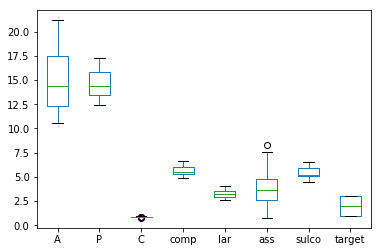

In [151]:
data_novo.plot.box(['target'])

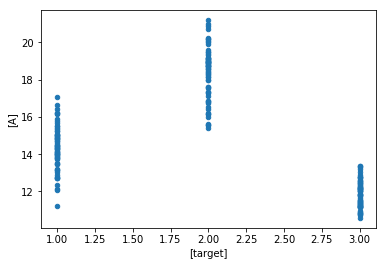

In [152]:
data_novo.plot.scatter(['target'],['A'])

# Separando os rótulos do conjunto de dados para treinamento

In [22]:
# separando target
y = data_novo['target']
X = data_novo.drop('target',axis=1)


In [21]:

X.head()

,A,P,C,comp,lar,ass,sulco
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


# Definindo arquitetura da rede neural

## Parâmetros do modelo da rede neural

A quantidade de neurônios nas camadas ocultas levam em consideração a fórmula descrita no projeto , onde o 'a' foi definido em 0.5, 2 e 3

In [34]:
#para a=0.5
param1 = {'hidden_layer_sizes':[(1,1),(2,)],'activation':['relu','tanh','logistic'],'learning_rate_init':[0.01,0.1,0.001]}

#para a=2 e com 1 neurônio na camada de saída
param2 = {'hidden_layer_sizes':[(3,3),(2,4),(4,2),(6,),(2,3,1)],'activation':['relu','tanh','logistic'],'learning_rate_init':[0.01,0.1,0.001]}

#para a=3
param3 = {'hidden_layer_sizes':[(8,),(4,4),(2,6),(6,2),(7,1),(1,7)],'activation':['relu','tanh'],'learning_rate_init':[0.01,0.1,0.001]}

## Solver usado no projeto

O *solver* utilizado no projeto foi o *lbfgs*. Foi escolhido este solver devido que para conjuntos de dados pequenos, os "lbfgs" podem convergir mais rapidamente e ter melhor desempenho. Já o *adam* que é o padrão do método *MPLClassifier* funciona muito bem para conjunto de dados relativamente grande (com milhares de amostras de dados) em termos de tempo de treinamento e pontuação de validação.


In [37]:
model = MLPClassifier(solver='lbfgs')

# Treinamento levando em consideração o a = 0.5

In [38]:
clf = GridSearchCV(model,param1,cv=3)

In [39]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(1, 1), (2,)], 'activation': ['relu', 'tanh', 'logistic'], 'learning_rate_init': [0.01, 0.1, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Acurácia dos modelos gerados

In [87]:
acc_models = pd.DataFrame(clf.grid_scores_)
acc_models['mean_validation_score']

/home/jailson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0     0.457286
1     0.341709
2     0.487437
3     0.532663
4     0.527638
5     0.457286
6     0.341709
7     0.341709
8     0.341709
9     0.341709
10    0.512563
11    0.341709
12    0.613065
13    0.442211
14    0.442211
15    0.864322
16    0.703518
17    0.849246
Name: mean_validation_score, dtype: float64

## Parâmetros da melhor rede 

In [90]:
pd.DataFrame(clf.best_params_)

,activation,hidden_layer_sizes,learning_rate_init
0,logistic,2,0.01


## Acurácia do melhor modelo gerado

In [89]:
clf.best_score_

0.864321608040201

## Acurácia das predições geradas pelo melhor modelo

In [91]:
predict = clf.predict(X)

In [93]:
accuracy_score(y,predict)

0.9597989949748744

# Treinamento levando em consideração o a = 2

In [132]:
clf1 = GridSearchCV(model,param2,cv=3)

In [97]:
clf1.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(3, 3), (2, 4), (4, 2), (6,), (2, 3, 1)], 'activation': ['relu', 'tanh', 'logistic'], 'learning_rate_init': [0.01, 0.1, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Acurácia dos modelos gerados

In [100]:
acc_models = pd.DataFrame(clf1.grid_scores_)
acc_models['mean_validation_score']

/home/jailson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0     0.341709
1     0.834171
2     0.477387
3     0.537688
4     0.341709
5     0.341709
6     0.537688
7     0.341709
8     0.502513
9     0.688442
10    0.939698
11    0.683417
12    0.341709
13    0.537688
14    0.522613
15    0.668342
16    0.718593
17    0.341709
18    0.532663
19    0.527638
20    0.477387
21    0.798995
22    0.839196
23    0.713568
24    0.547739
25    0.713568
26    0.703518
27    0.341709
28    0.452261
29    0.341709
30    0.849246
31    0.869347
32    0.798995
33    0.698492
34    0.512563
35    0.854271
36    0.768844
37    0.819095
38    0.829146
39    0.849246
40    0.864322
41    0.894472
42    0.341709
43    0.557789
44    0.638191
Name: mean_validation_score, dtype: float64

## Parâmetros da melhor rede

In [103]:
pd.DataFrame(clf1.best_params_)

,activation,hidden_layer_sizes,learning_rate_init
0,relu,6,0.1


## Acurácia do melhor modelo gerado

In [107]:
clf.best_score_

0.864321608040201

## Acurácia das predições geradas pelo melhor modelo 

In [108]:
predict = clf1.predict(X)

In [109]:
accuracy_score(y,predict)

0.9849246231155779

# Treinamento levando em consideração a = 3

In [125]:
clf2 = GridSearchCV(model,param3,cv=3)

In [126]:
clf2.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(8,), (4, 4), (2, 6), (6, 2), (7, 1), (1, 7)], 'activation': ['relu', 'tanh'], 'learning_rate_init': [0.01, 0.1, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Acurácia do modelos gerados

In [127]:
acc_models = pd.DataFrame(clf2.grid_scores_)
acc_models['mean_validation_score']

/home/jailson/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


0     0.683417
1     0.708543
2     0.869347
3     0.653266
4     0.608040
5     0.708543
6     0.492462
7     0.542714
8     0.341709
9     0.542714
10    0.678392
11    0.522613
12    0.341709
13    0.341709
14    0.341709
15    0.341709
16    0.537688
17    0.537688
18    0.884422
19    0.924623
20    0.904523
21    0.618090
22    0.557789
23    0.814070
24    0.678392
25    0.522613
26    0.718593
27    0.713568
28    0.824121
29    0.638191
30    0.839196
31    0.723618
32    0.633166
33    0.341709
34    0.341709
35    0.341709
Name: mean_validation_score, dtype: float64

## Parâmetros da melhor rede

In [128]:
pd.DataFrame(clf2.best_params_)

,activation,hidden_layer_sizes,learning_rate_init
0,tanh,8,0.1


## Acurácia do melhor modelo gerado

In [129]:
clf2.best_score_

0.9246231155778895

## Acurácia das predições geradas pelo melhor modelo

In [130]:
predict = clf2.predict(X)

In [131]:
accuracy_score(y,predict)

0.9798994974874372

# Conclusão

*Levando em consideração os melhores modelos gerados, conforme o cálculo para uma certa quantidade de neurônios em uma camada oculta, o modelo que obteve a melhor acurácia foi o modelo que leva em consideração o alfa = 2. Onde o melhor modelo gerado pelo GrindSearchCV deu a acurácia com o valor igual a **0.98** com os seguintes parâmetros:*
    
   **- Activation:** relu
   
   **- hidden_layer_sizes:** 6
   
   **- Learning_rate_init:** 0.1
   
*As outras redes cujo o alfa com valores de 0.5 e 3, obtiveram uma acurácia de* **0.95** e **0.97**  
